here I use a guide from https://course.fast.ai/ 

# Image-Classification

In [1]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

# 1 Download images of bicycle, bus or train 

In [3]:
# if this code does give an error-message then just run it a second time 

# from duckduckgo_search import ddg_images
from fastcore.all import *

#def search_images(term, max_images=30):
#    print(f"Searching for '{term}'")
#    return L(ddg_images(term, max_results=max_images)).itemgot('image')


#Quelle: https://forums.fast.ai/t/duckduckgo-search-not-working/105738/39?page=2
from duckduckgo_search import DDGS
def search_images(term, max_images=200):
    with DDGS(headers = {"Accept-Encoding": "gzip, deflate, br"}) as ddgs:
        results = ddgs.images(keywords=term)[0:max_images]  #ist kein iterator - das ist rin problem
        images = [res.get("image") for res in results] 
        return L(images)


### 1.1 einzelne Bilder, die wir zur Veranschaulichung benützen

In [10]:
from fastai.vision.all import *
from fastdownload import download_url
from time import sleep


#### ein einzelnes Bus-Foto

In [9]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('bus', max_images=1)
urls[0]

'http://upload.wikimedia.org/wikipedia/commons/2/2f/Bangalore_Metropolitan_Transport_Corporation_Volvo_B7RLE_bus,_India.jpg'

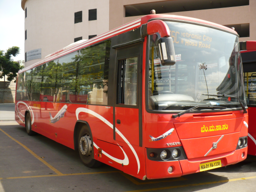

In [17]:
#download URL
ziel_datei = 'Bsp_bus.jpg'
download_url(urls[0], ziel_datei, show_progress=False)

####################################

#have a look at the URL
bild = Image.open(ziel_datei)
bild.to_thumb(256,256)

#### ein einzelnes Auto-Foto

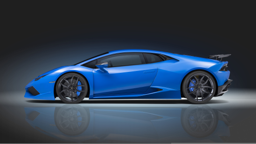

In [54]:
suchbegriff = 'Auto blau'
ziel_datei = 'Bsp_car_2.jpg'

####################################

#getting URLs from a search:
urls = search_images(suchbegriff, max_images=1)
#look at the URL
print(urls[0])

####################################

#download URL
download_url(urls[0], ziel_datei, show_progress=False)

####################################

#have a look at the URL
bild = Image.open(ziel_datei)
bild.to_thumb(256,256)

#### ein einzelnes Fahrrad-Foto

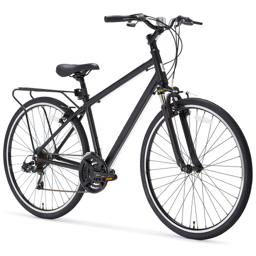

In [40]:
suchbegriff = 'bicycle'
ziel_datei = 'Bsp_bicycle.jpg'

####################################

#getting URLs from a search:
urls = search_images(suchbegriff, max_images=1)
#look at the URL
print(urls[0])

####################################

#download URL
download_url(urls[0], ziel_datei, show_progress=False)

####################################

#have a look at the URL
bild = Image.open(ziel_datei)
bild.to_thumb(256,256)

## 1.2 Bilder downloaden fürs Model-trainieren

In [ ]:
dict_suchbegriff = {'bicycle': ['bicycle'],
                    'bus': ['Bus Verkehr', 'Stadtbus', 'Bus wiener linien'],
                    'car': ['Auto kaufen', 'Auto']
                    }
#je Suchbegriff werden 200 Bilder runtergeladen

path = Path('bus_or_train') #Pfad in dem sie gespeichert werden

for category, suchbegriffe in dict_suchbegriff.items():
    dest = (path/category)   #Fotos zu jede Kategorie werden in einem eigenen Ordner gespeichert
    dest.mkdir(exist_ok=True, parents=True)

    for suchbegriff in suchbegriffe:
        download_images(dest, urls=search_images(suchbegriff))
        sleep(10)  # Pause between searches to avoid over-loading server

    resize_images(path/category, max_size=400, dest=path/category) #resize so it is much faster

In [8]:
#searches = 'Stadtbus','train'
#path = Path('bird_or_forest')

#for o in searches:
#    dest = (path/o)
#    dest.mkdir(exist_ok=True, parents=True)

#    download_images(dest, urls=search_images(f'{o} photo'))
#    sleep(10)  # Pause between searches to avoid over-loading server
#    download_images(dest, urls=search_images(f'{o} sun photo'))
#    sleep(10)
#    download_images(dest, urls=search_images(f'{o} shade photo'))
#    sleep(10)

#    resize_images(path/o, max_size=400, dest=path/o) #resize so it is much faster

In [9]:
searches = 'bus','car','bicycle'
path = Path('bus_or_train')

for o in ['bus']:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} Bus Verkehr'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} Stadtbus'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} Bus wiener linien'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o) #resize so it is much faster


for o in ['car']:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} Auto kaufen'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} Auto'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o) #resize so it is much faster

In [27]:
for o in ['bicycle']:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} bicycle'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o) #resize so it is much faster


# 2. Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [31]:
#we delete the pictures that are brocken. 
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed) 

0

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

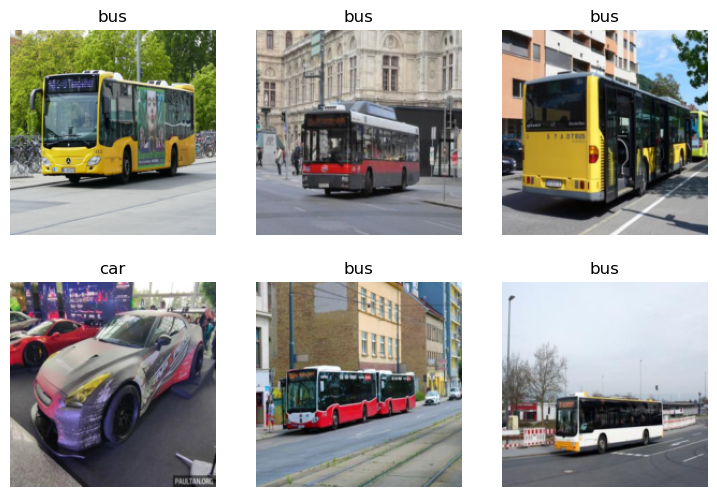

In [9]:
#DataBlock: question how to get this data in my model. 
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #what kind of input do we have
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "bird" or "forest").

    get_items=get_image_files, 

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *bird* or *forest*).

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

### train the model

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.939996,0.112979,0.045045,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.162803,0.067239,0.018018,00:04
1,0.098232,0.071841,0.018018,00:03
2,0.063554,0.063694,0.009009,00:03


Generally when I run this I see 100% accuracy on the validation set (although it might vary a bit from run to run).

"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the *pretrained model*), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in *imagenet*, and widely-used computer vision dataset with images covering 1000 categories) For details on fine-tuning and why it's important, check out the [free fast.ai course](https://course.fast.ai/).

# 3. predictions

In [12]:
this_is,_,probs = learn.predict(PILImage.create('Bsp_bicycle.jpg'))
print(f"This is a: {this_is}.")
print(f"Probability it's a bicycle: {probs[0]:.4f}") #probs[0] steht für Fahrrad

This is a: bicycle.
Probability it's a bicycle: 0.9999


In [58]:
this_is,_,probs = learn.predict(PILImage.create('Bsp_car_2.jpg'))
print(f"This is a: {this_is}.")
print(f"Probability it's a car: {probs[2]:.4f}")  #probs[2] steht für Auto

This is a: car.
Probability it's a car: 1.0000


In [59]:
this_is,_,probs = learn.predict(PILImage.create('Bsp_bus.jpg'))
print(f"This is a: {this_is}.")
print(f"Probability it's a bus: {probs[1]:.4f}") #probs[1] steht für Bus

This is a: bus.
Probability it's a bus: 0.9993


In [60]:
this_is,_,probs = learn.predict(PILImage.create('Bsp_feet.jpg'))
print(f"This is a: {this_is}.")
print("with all Probability:",probs)

This is a: car.
with all Probability: tensor([1.6419e-01, 2.9918e-06, 8.3580e-01])


In [16]:
# funktion um Vorhersagen im Dictonary-Format zu bekommen 
categories = ('bicycle','bus','car')

def classify_dict_image(img):
    prediction,_,probability = learn.predict(img)
    return dict(zip(categories,map(float,probability)))




In [23]:
# ich habe das selbst geschrieben - weiß aber noch nicht ob es funktioniert. das muss ich noch testen. gegebenfalls sind hier fehler drinnen

def vorhersage(foto):
    prediction,_,probability_tuple = learn.predict(foto)

    categories = ('bicycle','bus','car') # sind alphabetisch geordnet 

#    if prediction == 'bicycle':
#        probability = probability_tuple[0]
#    elif prediction == 'bus':
#        probability = probability_tuple[1]
#    else:  #prediction == 'car'
#        probability = probability_tuple[2]

    for number, category in enumerate(categories):
        if prediction == category:
            probability = probability_tuple[number] # probability_tuple[1] stands for "bus"

    return prediction, probability


bus
tensor(0.9955)


In [25]:
foto = PILImage.create('Bsp_car_2.jpg')

prediction, probability = vorhersage(foto)
print(f"This is a {prediction} with {probability:.4f} probability.") 

Probability it's a bus: 1.0000


('car', tensor(1.0000))

In [14]:
foto = PILImage.create('Bsp_bus.jpg')
this_is,_,probs = learn.predict(foto)
print(f"This is a: {this_is}.")
print(f"Probability it's a bus: {probs[1]:.4f}") #probs[1] steht für Bus

This is a: bus.
Probability it's a bus: 0.9955


In [17]:
img = PILImage.create('Bsp_feet.jpg')
classify_dict_image(img)

{'bicycle': 0.010213701985776424,
 'bus': 0.0011106330202892423,
 'car': 0.988675594329834}

# 4. export model in pkl-file

In [61]:
#export the model
learn.export('model_image-classifier.pkl')

---

---

---

---

---

---